# MSV / SS 2023 - Übung 5

In [1]:
import nltk
import numpy as np
import pandas as pd

In [18]:
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download("brown")
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/alessandra/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/alessandra/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package brown to
[nltk_data]     /Users/alessandra/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/alessandra/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
from nltk.corpus import wordnet as wn

## 5.1 WordNet

#### 1 Wort, 1 Bedeutung (Synset)

In [5]:
wn.synsets("sofa")

[Synset('sofa.n.01')]

#### Mehrdeutigkeit: 1 Wort, > 1 Bedeutungen

In [6]:
for ss in wn.synsets("bass"):
    print(ss, ss.definition())

Synset('bass.n.01') the lowest part of the musical range
Synset('bass.n.02') the lowest part in polyphonic music
Synset('bass.n.03') an adult male singer with the lowest voice
Synset('sea_bass.n.01') the lean flesh of a saltwater fish of the family Serranidae
Synset('freshwater_bass.n.01') any of various North American freshwater fish with lean flesh (especially of the genus Micropterus)
Synset('bass.n.06') the lowest adult male singing voice
Synset('bass.n.07') the member with the lowest range of a family of musical instruments
Synset('bass.n.08') nontechnical name for any of numerous edible marine and freshwater spiny-finned fishes
Synset('bass.s.01') having or denoting a low vocal or instrumental range


### 5.1.1 Bedeutungsrelationen
#### Synonyme (1 Bedeutung, >1 Wörter)

In [ ]:
wn.synset('sofa.n.01').lemma_names()

#### Antonymie

In [ ]:
wn.lemma('night.n.01.night').antonyms()

In [ ]:
for ss in wn.synsets("old"):
    print(ss, ss.definition())

In [ ]:
wn.lemma('old.a.01.old').antonyms()

In [ ]:
wn.lemma('old.a.02.old').antonyms()

#### Hyponymie und Hyperonymie

In [ ]:
for ss in wn.synsets("bass"):
    print(ss, ss.definition())

In [ ]:
wn.synset('sea_bass.n.01').hypernyms()

In [ ]:
wn.synset('bass.n.07').hypernyms()

In [ ]:
wn.synset('musical_instrument.n.01').definition()

In [ ]:
wn.synset('musical_instrument.n.01').hyponyms()

In [ ]:
wn.synset('bass.n.07').lowest_common_hypernyms(wn.synset('trumpet.n.01'))

In [ ]:
wn.synset('trumpet.n.01').lowest_common_hypernyms(wn.synset('french_horn.n.01'))

### 5.1.2 WSD mit Wordnet: Lesk-Algorithmus

In [7]:
from nltk.wsd import lesk

for ss in wn.synsets('bass'):
    print(ss, ss.definition())

Synset('bass.n.01') the lowest part of the musical range
Synset('bass.n.02') the lowest part in polyphonic music
Synset('bass.n.03') an adult male singer with the lowest voice
Synset('sea_bass.n.01') the lean flesh of a saltwater fish of the family Serranidae
Synset('freshwater_bass.n.01') any of various North American freshwater fish with lean flesh (especially of the genus Micropterus)
Synset('bass.n.06') the lowest adult male singing voice
Synset('bass.n.07') the member with the lowest range of a family of musical instruments
Synset('bass.n.08') nontechnical name for any of numerous edible marine and freshwater spiny-finned fishes
Synset('bass.s.01') having or denoting a low vocal or instrumental range


In [10]:
bass_par_1 = "Being fond and passionate about music since childhood, De Angelis started playing guitar at the age of 8 and began playing bass in the seventh grade."
bass_par_2 = "Striped bass has lean, white flesh with a mild flavor and a medium texture. It is extremely versatile in that it can be pan-seared, grilled, steamed, poached, roasted, broiled, sautéed, and deep fried (including batter-frying).."

In [11]:
print(bass_par_1)
print(bass_par_2)

Being fond and passionate about music since childhood, De Angelis started playing guitar at the age of 8 and began playing bass in the seventh grade.
Striped bass has lean, white flesh with a mild flavor and a medium texture. It is extremely versatile in that it can be pan-seared, grilled, steamed, poached, roasted, broiled, sautéed, and deep fried (including batter-frying)..


In [9]:
from nltk.tokenize import word_tokenize

print(lesk(word_tokenize(bass_par_1), "bass", "n"))
print(lesk(word_tokenize(bass_par_2), "bass", "n"))

Synset('bass.n.02')
Synset('sea_bass.n.01')


### 5.1.3 Semantische Ähnlichkeiten mit WordNet 

In [12]:
wn.synset('bird.n.01').definition()

'warm-blooded egg-laying vertebrates characterized by feathers and forelimbs modified as wings'

<b>Path Similarity</b>: Shortest path that connects the senses in the is-a (hypernym/hypnoym) taxonomy.

In [ ]:
sparrow = wn.synset('sparrow.n.01')
robin = wn.synset('robin.n.01')
eagle = wn.synset('eagle.n.01')
bat = wn.synset('bat.n.01')
mouse = wn.synset('mouse.n.01')

In [ ]:
sparrow.path_similarity(robin)

In [ ]:
wn.synset('sparrow.n.01').lowest_common_hypernyms(wn.synset('robin.n.01'))

In [ ]:
sparrow.path_similarity(eagle)

In [ ]:
wn.synset('sparrow.n.01').lowest_common_hypernyms(wn.synset('eagle.n.01'))

In [ ]:
sparrow.path_similarity(bat)

In [ ]:
wn.synset('sparrow.n.01').lowest_common_hypernyms(wn.synset('bat.n.01'))

In [ ]:
sparrow.path_similarity(mouse)

In [ ]:
wn.synset('sparrow.n.01').lowest_common_hypernyms(wn.synset('mouse.n.01'))

In [ ]:
sparrow.hypernym_paths()

## 5.2 Wörter als Vektoren

In [19]:
from sklearn.metrics.pairwise import cosine_similarity

### Eine Kookkurrenz-Matrix (Brown Corpus)

In [22]:
from nltk.corpus import brown
from string import punctuation
from nltk.corpus import stopwords

#### Entfernung von Satzzeichen und Stopwords

In [24]:
punctuation = list(punctuation)
punctuation += ['``', "''", '--']

In [25]:
cleaned_brown = [token for token in brown.words() if token not in punctuation]

In [26]:
stop_words = stopwords.words('english')
stop_words += ['one', 'two', 'get', 'got', 'could', 'may', 'would']

In [27]:
cleaned_brown = [token for token in cleaned_brown if token.lower() not in stop_words]

#### Stemming
Ähnlich wie Lemmatization, aber wir behalten nur den Wortstamm

In [28]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
cleaned_brown = [stemmer.stem(token) for token in cleaned_brown]

In [29]:
cleaned_brown[0:200]

['fulton',
 'counti',
 'grand',
 'juri',
 'said',
 'friday',
 'investig',
 "atlanta'",
 'recent',
 'primari',
 'elect',
 'produc',
 'evid',
 'irregular',
 'took',
 'place',
 'juri',
 'said',
 'term-end',
 'present',
 'citi',
 'execut',
 'committe',
 'over-al',
 'charg',
 'elect',
 'deserv',
 'prais',
 'thank',
 'citi',
 'atlanta',
 'manner',
 'elect',
 'conduct',
 'september-octob',
 'term',
 'juri',
 'charg',
 'fulton',
 'superior',
 'court',
 'judg',
 'durwood',
 'pye',
 'investig',
 'report',
 'possibl',
 'irregular',
 'hard-fought',
 'primari',
 'mayor-nomin',
 'ivan',
 'allen',
 'jr.',
 'rel',
 'hand',
 'report',
 'receiv',
 'juri',
 'said',
 'consid',
 'widespread',
 'interest',
 'elect',
 'number',
 'voter',
 'size',
 'citi',
 'juri',
 'said',
 'find',
 'mani',
 "georgia'",
 'registr',
 'elect',
 'law',
 'outmod',
 'inadequ',
 'often',
 'ambigu',
 'recommend',
 'fulton',
 'legisl',
 'act',
 'law',
 'studi',
 'revis',
 'end',
 'modern',
 'improv',
 'grand',
 'juri',
 'comment',
 

#### 5-Wörter-Fenster

6-Grams: 
- target w1 w2 w3 w4 w5
- w1 w2 w3 w4 target

In [31]:
from collections import Counter
from nltk import ngrams
sixgrams = Counter(list(ngrams(cleaned_brown,6)))

#### Target-Wörter und Kontext-Wörter

In [33]:
words = ["beer", "car", "dog", "knife", "truck", "wine"]
words = [stemmer.stem(token) for token in words]
contexts = ["buy", "cut", "drink", "drive", "hold", "load", "open", "run"]
contexts = [stemmer.stem(token) for token in contexts]

#### Die Kookkurrenz-Matrix

In [34]:
cooccurrence = {}

for k in sixgrams.keys():
    
    if k[0] in words:  
        
        if k[0] not in cooccurrence.keys(): cooccurrence[k[0]] = {}

        for c_word in k: 
            
            if c_word != k[0]:
            
                if c_word in cooccurrence[k[0]].keys(): cooccurrence[k[0]][c_word] += 1
                else: cooccurrence[k[0]][c_word] = 1
                
    if k[4] in words:
        
        if k[4] not in cooccurrence.keys(): cooccurrence[k[4]] = {}

        for c_word in k:
                        
            if c_word != k[4]: 
                if c_word in cooccurrence[k[4]].keys():  cooccurrence[k[4]][c_word] += 1
                else: cooccurrence[k[4]][c_word] = 1

for w in words:
    for c in contexts:
        if c not in cooccurrence[w].keys(): cooccurrence[w][c] = 0

cooccurrence_df = pd.DataFrame.from_dict(cooccurrence, orient='index')
cooccurrence_df.drop(columns=[col for col in cooccurrence_df if col not in contexts], inplace=True)

cooccurrence_df = cooccurrence_df.reindex(sorted(cooccurrence_df.columns), axis=1).sort_index()
cooccurrence_df

,buy,cut,drink,drive,hold,load,open,run
beer,0,1,6,0,0,0,1,1
car,3,3,1,32,1,15,6,9
dog,0,1,0,1,0,0,1,6
knife,0,9,0,0,4,0,2,2
truck,2,0,1,4,0,1,2,4
wine,0,0,5,1,0,0,3,1


### Kosinus-Ähnlichkeiten

In [35]:
v_beer = cooccurrence_df.loc[['beer']]
v_wine = cooccurrence_df.loc[['wine']]
print("cosine similarity between 'beer' and 'wine': " + str(cosine_similarity(v_beer, v_wine)))

cosine similarity between 'beer' and 'wine': [[0.90739287]]


In [36]:
v_car = cooccurrence_df.loc[['car']]
v_truck = cooccurrence_df.loc[['truck']]
print("cosine similarity between 'car' and 'truck': " + str(cosine_similarity(v_car, v_truck)))

cosine similarity between 'car' and 'truck': [[0.82065181]]


In [37]:
v_beer = cooccurrence_df.loc[['beer']]
v_car = cooccurrence_df.loc[['car']]
print("cosine similarity between 'beer' and 'car': " + str(cosine_similarity(v_beer, v_car)))

cosine similarity between 'beer' and 'car': [[0.10322795]]


### Ungesehene Wörter

In [38]:
### Vektor für brewsky: "I’d like to drink a brewski with my pizza"
v_brewsky = [[0, 0, 1, 0, 0, 0, 0, 0]] 
### Vektor für sedan: "he loaded the sedan and drove away"
v_sedan = [[0, 0, 0, 1, 0, 1, 0, 0]]

In [39]:
print("cosine similarity between 'brewsky' and 'beer': " + str(cosine_similarity(v_brewsky, v_beer)))
print("cosine similarity between 'brewsky' and 'car': " + str(cosine_similarity(v_brewsky, v_car)))
print("cosine similarity between 'sedan' and 'beer': " + str(cosine_similarity(v_sedan, v_beer)))
print("cosine similarity between 'sedan' and 'car': " + str(cosine_similarity(v_sedan, v_car)))

cosine similarity between 'brewsky' and 'beer': [[0.96076892]]
cosine similarity between 'brewsky' and 'car': [[0.02686077]]
cosine similarity between 'sedan' and 'beer': [[0.]]
cosine similarity between 'sedan' and 'car': [[0.89269118]]


### Visualisierung

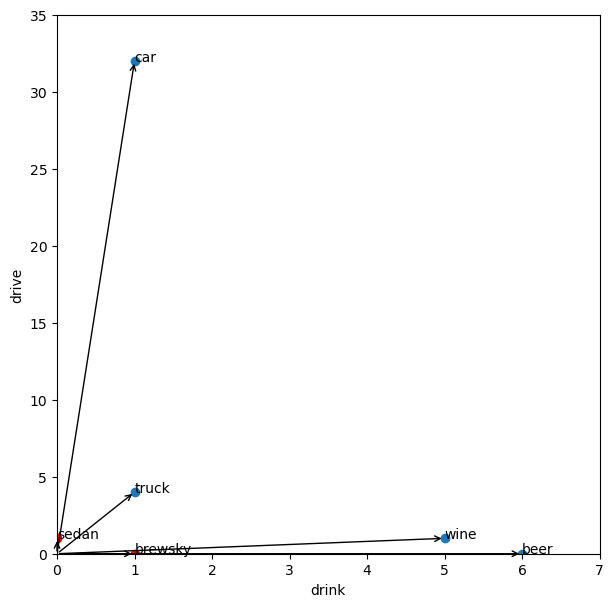

In [40]:
import matplotlib.pyplot as plt

to_plot_w = ['beer', 'car', 'truck', 'wine']
to_plot = cooccurrence_df.loc[to_plot_w]

fig, ax = plt.subplots(figsize=(7,7))

ax.scatter(to_plot['drink'], to_plot['drive'])
ax.scatter(0, 1, color="red")
ax.scatter(1, 0, color="red")

for i, label in enumerate(to_plot_w):
    ax.annotate(label, (to_plot['drink'][i], to_plot['drive'][i]))
    ax.annotate("", xy=(to_plot['drink'][i], to_plot['drive'][i]), xytext=(0, 0), arrowprops=dict(arrowstyle="->"))

ax.annotate('sedan', (0, 1))
ax.annotate("", xy=(0, 1), xytext=(0, 0), arrowprops=dict(arrowstyle="->"))
ax.annotate('brewsky', (1, 0))
ax.annotate("", xy=(1, 0), xytext=(0, 0), arrowprops=dict(arrowstyle="->"))
ax.set_xlabel('drink')
ax.set_ylabel('drive')
ax.set_xlim([0, 7])
ax.set_ylim([0, 35])

plt.show()

## 5.3 Gewichtungsfunktionen
### Uninformative Wörter (Brown Corpus)

In [26]:
cleaned_brown = [token for token in brown.words() if token not in punctuation]
sixgrams = Counter(list(ngrams(cleaned_brown,6)))

In [27]:
cooccurrence = {}

for k in sixgrams.keys():
    
    if k[0] == "car": 
        
        for c_word in k[1:4]: 
                       
            if c_word in cooccurrence.keys(): cooccurrence[c_word] += 1
            else: cooccurrence[c_word] = 1
                
    if k[4] == "car":
        
        for c_word in k[0:3]:

            if c_word in cooccurrence.keys():  cooccurrence[c_word] += 1
            else: cooccurrence[c_word] = 1
                
cooccurrence = {key:val for key, val in cooccurrence.items() if val > 5}               
print(dict(sorted(cooccurrence.items(), key = lambda x: x[1], reverse = True)))

{'the': 106, 'in': 48, 'and': 47, 'of': 44, 'to': 44, 'a': 43, 'was': 31, 'with': 23, 'The': 19, 'I': 19, 'is': 16, 'you': 16, 'on': 15, 'had': 15, 'by': 13, 'he': 13, 'at': 13, 'He': 12, 'into': 12, 'it': 11, 'that': 11, 'for': 11, 'out': 10, 'as': 9, 'his': 9, 'up': 9, 'when': 9, 'which': 9, 'got': 9, 'will': 8, 'said': 8, 'be': 8, 'one': 8, 'take': 7, 'driving': 7, 'have': 7, 'back': 7, 'coming': 7, 'around': 6, 'get': 6, 'but': 6, 'before': 6, 'drive': 6, 'she': 6, 'parked': 6, 'see': 6}


### PPMI (Beispiel aus Jurafsky & Martin, Chapter 6)

In [28]:
book_example = [(2, 8, 9, 442, 25),
                (0, 0, 1, 60, 19),
                (1670, 1683, 85, 5, 4),
                (3325, 3982, 378, 5, 13)]
book_example_df = pd.DataFrame(book_example, columns = ['computer' , 'data', 'result', 'pie', 'sugar'], index=['cherry' , 'strawberry', 'digital', 'information'])

print(book_example_df)

             computer  data  result  pie  sugar
cherry              2     8       9  442     25
strawberry          0     0       1   60     19
digital          1670  1683      85    5      4
information      3325  3982     378    5     13


In [29]:
f_pairs = book_example_df.values.sum()
print("total n of pairs: " + str(f_pairs))

total n of pairs: 11716


In [30]:
f_w = {}
p_w = {} 
f_c = {}
p_c = {}
p_w_c = {}

for w in book_example_df.index.values:

    f_w[w] = sum(book_example_df.loc[w]) # word frequency
    p_w_c[w] = {}
    
    for c in book_example_df.keys():
        f_c[c] = sum(book_example_df[c]) # context frequency
        p_c[c] = f_c[c]/f_pairs
        
        p_w_c[w][c] = book_example_df[c][w]/f_pairs
        
    p_w[w] = f_w[w]/f_pairs
    
p_w_c_df = pd.DataFrame.from_dict(p_w_c).T
p_w_c_df

,computer,data,result,pie,sugar
cherry,0.000171,0.000683,0.000768,0.037726,0.002134
strawberry,0.000000,0.000000,0.000085,0.005121,0.001622
digital,0.142540,0.143650,0.007255,0.000427,0.000341
information,0.283800,0.339877,0.032264,0.000427,0.001110


In [31]:
pmi_w_c = {}

for w in book_example_df.index.values:
    pmi_w_c[w] = {}
    
    for c in book_example_df.keys():
        
        pmi_w_c[w][c] = np.log2(p_w_c[w][c]/(p_w[w]*p_c[c]))
        if pmi_w_c[w][c] < 0: pmi_w_c[w][c] = 0
    
pmi_w_c_df = pd.DataFrame.from_dict(pmi_w_c).T
pmi_w_c_df

/var/folders/f2/mv_5t3993rdf7p8wg574rr240000gn/T/ipykernel_89585/2135732030.py:8: RuntimeWarning: divide by zero encountered in log2
  pmi_w_c[w][c] = np.log2(p_w_c[w][c]/(p_w[w]*p_c[c]))


,computer,data,result,pie,sugar
cherry,0.000000,0.000000,0.000000,4.379283,3.304499
strawberry,0.000000,0.000000,0.000000,4.101155,5.511455
digital,0.183853,0.011990,0.000000,0.000000,0.000000
information,0.017280,0.094369,0.281534,0.000000,0.000000


## 5.4 Word2vec
### Vektoren mit Gensim

In [32]:
import gensim
%matplotlib inline

``Gensim`` ist eine Open-Source-basierte Python Library für semantische Textanalysen - bitte installieren Sie 

* ``gensim`` (``pip install gensim``)

``Gensim`` implementiert beide Versionen des ``Word2Vec`` Modells mit :py:class:`~gensim.models.word2vec.Word2Vec`

1. Skip-grams (SG)
2. Continuous-bag-of-words (CBOW)

Wir werden uns auf Skip-gram fokusieren.

Schritte des ``Word2Vec`` Modells:

1. <i>w</i>, <i>c</i> Paare generieren 
2. Neuronales Netzwerk mit 1 verbogene Schicht trainieren, um die Wahrscheinlichkeitsverteilung für benachbarte Wörter für <i>w</i> zu berechnen
3. Die Gewichte zwischen der 'Projectionsschicht' und die verbogene Schicht sind die Embeddings (Länge eines Embeddingsvektors = Dimensionen der verbogenen Schicht)

Quelle für diese Übung: [Radim Řehůřek, Word2Vec Tutorial](https://radimrehurek.com/gensim/auto_examples/tutorials/run_word2vec.html#sphx-glr-auto-examples-tutorials-run-word2vec-py)

### Word2vec Demo

Daten: Google News corpus, 6B tokens (1M häufigsten Wörter)
Es ist wahrscheinlich, dass Sie eine erhöhte Datenrat brauchen (``jupyter notebook --NotebookApp.iopub_data_rate_limit=10000000`` im Terminal)

In [33]:
import gensim.downloader as api
wv = api.load('word2vec-google-news-300')

#### Wie sieht den Wortschatz aus?

In [34]:
for index, word in enumerate(wv.index_to_key):
    if index == 10:
        break
    print(f"word #{index}/{len(wv.index_to_key)} is {word}")

word #0/3000000 is </s>
word #1/3000000 is in
word #2/3000000 is for
word #3/3000000 is that
word #4/3000000 is is
word #5/3000000 is on
word #6/3000000 is ##
word #7/3000000 is The
word #8/3000000 is with
word #9/3000000 is said


#### Embeddingsvektor für <i>King</i>

In [35]:
vec_king = wv['king']
vec_king

array([ 1.25976562e-01,  2.97851562e-02,  8.60595703e-03,  1.39648438e-01,
       -2.56347656e-02, -3.61328125e-02,  1.11816406e-01, -1.98242188e-01,
        5.12695312e-02,  3.63281250e-01, -2.42187500e-01, -3.02734375e-01,
       -1.77734375e-01, -2.49023438e-02, -1.67968750e-01, -1.69921875e-01,
        3.46679688e-02,  5.21850586e-03,  4.63867188e-02,  1.28906250e-01,
        1.36718750e-01,  1.12792969e-01,  5.95703125e-02,  1.36718750e-01,
        1.01074219e-01, -1.76757812e-01, -2.51953125e-01,  5.98144531e-02,
        3.41796875e-01, -3.11279297e-02,  1.04492188e-01,  6.17675781e-02,
        1.24511719e-01,  4.00390625e-01, -3.22265625e-01,  8.39843750e-02,
        3.90625000e-02,  5.85937500e-03,  7.03125000e-02,  1.72851562e-01,
        1.38671875e-01, -2.31445312e-01,  2.83203125e-01,  1.42578125e-01,
        3.41796875e-01, -2.39257812e-02, -1.09863281e-01,  3.32031250e-02,
       -5.46875000e-02,  1.53198242e-02, -1.62109375e-01,  1.58203125e-01,
       -2.59765625e-01,  

### Bedeutungsrelationen

#### Wortähnlichkeit vs. Wortassoziationen

In [37]:
wv.similarity('snow', 'shovel')

0.35525683

In [38]:
wv.similarity('snow', 'knife')

0.14868608

In [39]:
wv.similarity('steak', 'shovel')

0.14396262

In [40]:
wv.similarity('steak', 'knife')

0.29534322

In [41]:
print(wv.most_similar(positive=['snow'], topn=20))

[('snowfall', 0.8324075937271118), ('heavy_snowfall', 0.774544894695282), ('slushy_snow', 0.7672874331474304), ('snows', 0.7531625032424927), ('snowstorm', 0.7439125776290894), ('snowfalls', 0.7268978953361511), ('heavy_snows', 0.7036325931549072), ('powdery_snow', 0.698024332523346), ('freezing_rain', 0.6863014698028564), ('sleet', 0.6840974688529968), ('snow_accumulation', 0.6814870834350586), ('wet_slushy', 0.6790135502815247), ('Heavy_snow', 0.6771509051322937), ('snow_blanketed', 0.6732733249664307), ('snow_accumulations', 0.672074556350708), ('blizzard', 0.6702598929405212), ('snow_flurries', 0.6697577238082886), ('heavy_snowfalls', 0.6693244576454163), ('snowdrifts', 0.6683523058891296), ('snowy', 0.6677355170249939)]


### Ungesehene Wörter

In [42]:
try:
    vec_cameroon = wv['covid']
except KeyError:
    print("The word 'covid' does not appear in this model")

The word 'covid' does not appear in this model


### Ähnlichkeitswerte für Wortpaare

In [44]:
pairs = [
    ('car', 'minivan'),   # a minivan is a kind of car
    ('car', 'bicycle'),   # still a wheeled vehicle
    ('car', 'airplane'),  # ok, no wheels, but still a vehicle
    ('car', 'cereal'),    # ... and so on
    ('car', 'existentialism'),
]
for w1, w2 in pairs:
    print('%r\t%r\t%.2f' % (w1, w2, wv.similarity(w1, w2)))

'car'	'minivan'	0.69
'car'	'bicycle'	0.54
'car'	'airplane'	0.42
'car'	'cereal'	0.14
'car'	'existentialism'	0.05


#### Synonimie vs. Hyponymie

In [45]:
print(wv.most_similar(positive=['singer'], topn=25))

[('songstress', 0.7598198056221008), ('crooner', 0.7473792433738708), ('musician_Johnny_Gimble', 0.7404474020004272), ('popstar', 0.7395411729812622), ('musician', 0.7350084185600281), ('singer_songwriter', 0.7292055487632751), ('pop_diva', 0.7135583162307739), ('rocker', 0.6933943033218384), ('vocalist', 0.6895747780799866), ('entertainer', 0.6856815814971924), ('songtress', 0.6783038377761841), ('pop_superstar', 0.6729615330696106), ('soul_diva', 0.6588881015777588), ('songwriter', 0.6584889888763428), ("R'n'B_singer", 0.6555497646331787), ('RnB_singer', 0.6553253531455994), ('hitmaker', 0.6541761755943298), ('singing_sensation', 0.6519666314125061), ('chanteuse', 0.6415913701057434), ('popster', 0.6399186253547668), ('pop_princess', 0.6372436881065369), ('actress', 0.6364269256591797), ('songstress_Amy_Winehouse', 0.6338778138160706), ('balladeer', 0.6216550469398499), ("R'n'B_star", 0.620928943157196)]


In [46]:
from nltk.corpus import wordnet as wn
wn.synset('singer.n.01').lemma_names()

['singer', 'vocalist', 'vocalizer', 'vocaliser']

In [47]:
wn.synset('singer.n.01').hyponyms()

[Synset('alto.n.01'),
 Synset('baritone.n.01'),
 Synset('bass.n.03'),
 Synset('canary.n.02'),
 Synset('caroler.n.01'),
 Synset('castrato.n.01'),
 Synset('chorister.n.01'),
 Synset('contralto.n.01'),
 Synset('crooner.n.01'),
 Synset('folk_singer.n.01'),
 Synset('hummer.n.01'),
 Synset('lieder_singer.n.01'),
 Synset('madrigalist.n.01'),
 Synset('opera_star.n.01'),
 Synset('rapper.n.01'),
 Synset('rock_star.n.01'),
 Synset('songster.n.02'),
 Synset('soprano.n.01'),
 Synset('tenor.n.03'),
 Synset('thrush.n.02'),
 Synset('torch_singer.n.01'),
 Synset('voice.n.07'),
 Synset('warbler.n.01'),
 Synset('yodeller.n.01')]

#### Odd-one-out / Was passt nicht in die Reihe?

In [48]:
print(wv.doesnt_match(['fire', 'water', 'land', 'sea', 'air', 'car']))

car


In [49]:
print(wv.doesnt_match(['robin', 'sparrow', 'penguin', 'chicken', 'ostrich', 'bat']))

bat


#### Antonymie vs. Synonymie

In [50]:
w1 = "tall"
w2 = "high"
w3 = "short"
w1_w2_dist = wv.distance(w1, w2)
w1_w3_dist = wv.distance(w1, w3)

print("Synonyms {}, {} have cosine distance: {}".format(w1, w2, w1_w2_dist))
print("Antonyms {}, {} have cosine distance: {}".format(w1, w3, w1_w3_dist))

Synonyms tall, high have cosine distance: 0.7967646270990372
Antonyms tall, short have cosine distance: 0.775605171918869


#### Mehrdeutigkeit

In [51]:
print(wv.most_similar(positive=['stick'], topn=50))

[('sticks', 0.7717417478561401), ('sticking', 0.5970414876937866), ('Stick', 0.5585183501243591), ('stuck', 0.5322182178497314), ('Sticking', 0.5237721800804138), ('Hovav_Shacham', 0.47736191749572754), ('poke', 0.4755040407180786), ('Vancouver_Donald_Brashear', 0.4653174579143524), ('Pedroia_perked', 0.4575902819633484), ('nunchuk_analog', 0.45050445199012756), ('tinker', 0.4422686994075775), ('Khabby', 0.42469120025634766), ('Ben_Van_Mooy', 0.42367082834243774), ('chuck', 0.42240750789642334), ('cling', 0.4218061864376068), ('Canuck_Donald_Brashear', 0.42164891958236694), ('hang', 0.42030227184295654), ('adhere', 0.4197036921977997), ('slap', 0.41821879148483276), ('Peverley_skated', 0.41376087069511414), ('dowel_rod', 0.4125410318374634), ('antagonizes_fellow', 0.41252401471138), ('stickhandle', 0.4112685024738312), ('keep', 0.40935683250427246), ('Coat_baking_sheet', 0.4092685878276825), ('broom_handle', 0.40806522965431213), ('Daria_Nyarangaruye', 0.40773850679397583), ('stickin',

In [52]:
print(wv.most_similar(positive=['bass'], topn=20))

[('crappie', 0.6551623940467834), ('largemouth', 0.651978075504303), ('largemouths', 0.6363434195518494), ('largemouth_bass', 0.6293675303459167), ('striper', 0.6191805601119995), ('stripers', 0.6170703768730164), ('smallmouth', 0.6161338686943054), ('Spotted_bass', 0.6154202222824097), ('acoustic_bass', 0.6130757927894592), ('upright_bass', 0.6106366515159607), ('sheepshead', 0.6058549880981445), ('redfish', 0.6051257848739624), ('basses', 0.6046233177185059), ('jerkbait', 0.6036754846572876), ('channel_catfish', 0.6004732847213745), ('bluegill', 0.5954744815826416), ('trout', 0.59325110912323), ('smallmouth_bass', 0.5909343361854553), ('walleyes', 0.5904234051704407), ('guitar', 0.5847724676132202)]


#### Crappie vs Guitar
    
![Image of a Crappie](https://upload.wikimedia.org/wikipedia/commons/thumb/4/4e/Pomoxis_nigromaculatus1.jpg/300px-Pomoxis_nigromaculatus1.jpg) 

In [53]:
wv.distance('crappie', 'guitar')

0.8140925616025925

### 5.5 Analogien mit Word2vec

* 'Man' : 'King' = 'Woman': ?
* 'Man' verhält sich zu 'King' wie 'Woman' zu .....?

* vec("king") - vec("man") + vec("woman") =~ vec("queen")

In [58]:
wv.most_similar(positive=['king', 'woman'], negative=['man'], topn=1)

[('queen', 0.7118192911148071)]

In [59]:
wv.most_similar(positive=['sister', 'man'], negative=['woman'], topn=1)

[('brother', 0.7966989874839783)]

In [60]:
wv.most_similar(positive=['aunt', 'man'], negative=['woman'], topn=1)

[('uncle', 0.7947131395339966)]

In [61]:
wv.most_similar(positive=['convent', 'man'], negative=['woman'], topn=1)

[('monastery', 0.6245499849319458)]

In [62]:
wv.most_similar(positive=['gynecologist', 'man'], negative=['woman'], topn=1)

[('urologist', 0.6808806657791138)]

#### Weitere Analogien

In [25]:
wv.most_similar(positive=['pasta', 'Germany'], negative=['Italy'], topn=1)

[('sauerkraut', 0.5501858592033386)]

In [26]:
wv.most_similar(positive=['pasta', 'Ukraine'], negative=['Italy'], topn=1)

[('borscht', 0.5453465580940247)]

In [27]:
wv.most_similar(positive=['dollar', 'Vietnam'], negative=['USA'], topn=1)

[('dong', 0.5227746963500977)]

In [28]:
wv.most_similar(positive=['dollar', 'Sweden'], negative=['USA'], topn=1)

[('Swedish_krona', 0.5703850984573364)]

In [29]:
wv.most_similar(positive=['Schweinsteiger', 'Italy'], negative=['Germany'], topn=1)

[('Totti', 0.7510467171669006)]

In [30]:
wv.most_similar(positive=['red', 'banana'], negative=['cherry'], topn=1)

[('yellow', 0.5295685529708862)]

In [31]:
wv.most_similar(positive=['red', 'potato'], negative=['cherry'], topn=1)

[('potatoes', 0.4832281768321991)]

#### Und die Grammatik auch?

In [32]:
wv.most_similar(positive=['flew', 'think'], negative=['fly'], topn=1)

[('thought', 0.573272168636322)]

In [33]:
wv.most_similar(positive=['best', 'bad'], negative=['good'], topn=1)

[('worst', 0.6776130795478821)]

In [34]:
wv.most_similar(positive=['Dickensian', 'Kafka'], negative=['Dickens'], topn=1)

[('Kafka_esque', 0.4589885473251343)]

In [35]:
wv.most_similar(positive=['hero', 'she'], negative=['he'], topn=1)

[('heroine', 0.7288749814033508)]

#### Gschlechtsverzerrungen im word2vec

In [63]:
wv.most_similar(positive=['computer_programmer', 'woman'], negative=['man'], topn=1)

[('homemaker', 0.5627119541168213)]

In [37]:
wv.most_similar(positive=['doctor', 'she'], negative=['he'], topn=1)

[('nurse', 0.6588720679283142)]

In [38]:
wv.most_similar(positive=['pilot', 'she'], negative=['he'], topn=1)

[('flight_attendant', 0.47942712903022766)]

In [39]:
wv.most_similar(positive=['brilliant', 'she'], negative=['he'], topn=1)

[('fabulous', 0.5702179670333862)]

In [40]:
wv.most_similar(positive=['affectionate', 'he'], negative=['she'], topn=1)

[('genial', 0.5280765295028687)]

In [41]:
wv.most_similar(positive=['childcare', 'he'], negative=['she'], topn=1)

[('apprenticeships', 0.48173215985298157)]

#### Visualisierung

In [64]:
from sklearn.decomposition import PCA
import numpy as np 
# Get the interactive Tools for Matplotlib
%matplotlib notebook
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def display_pca_scatterplot(model, words=None, sample=0):
    if words == None:
        if sample > 0:
            words = np.random.choice(list(model.vocab.keys()), sample)
        else:
            words = [ word for word in model.vocab ]
        
    word_vectors = np.array([model[w] for w in words])

    twodim = PCA().fit_transform(word_vectors)[:,:2]
    
    plt.figure(figsize=(6,6))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)


<IPython.core.display.Javascript object>


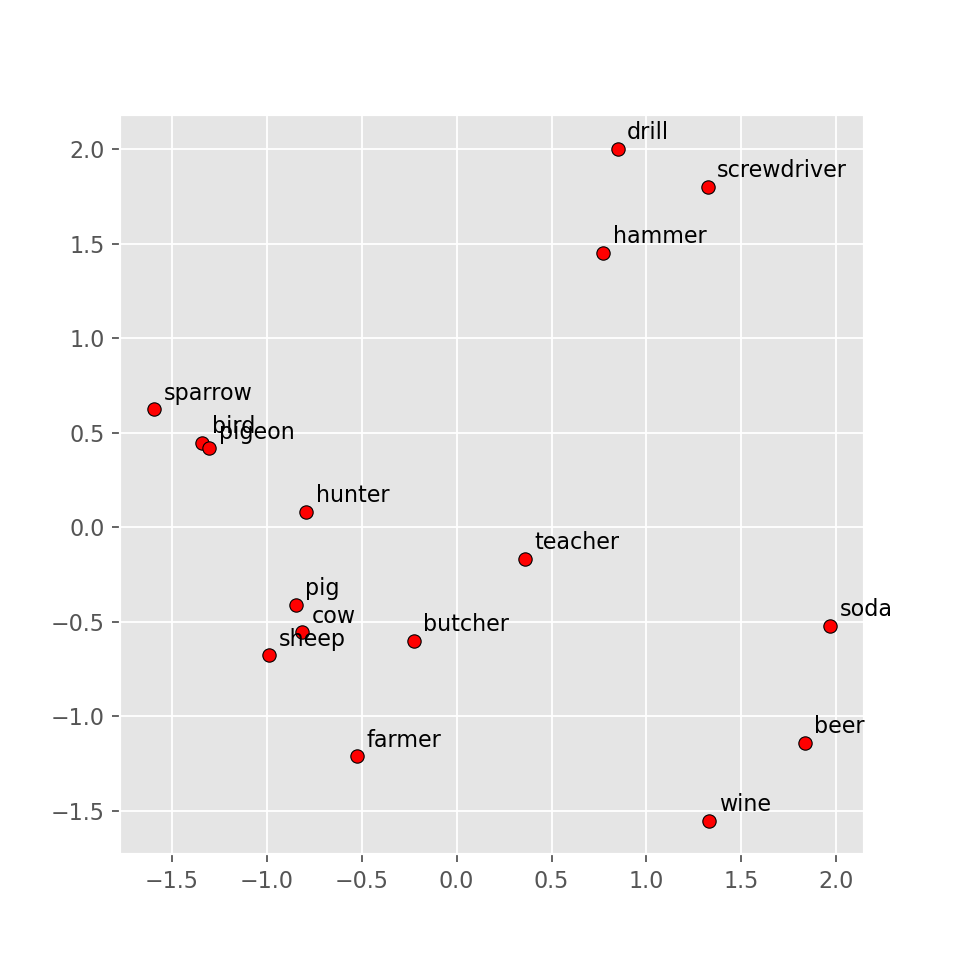

In [65]:
display_pca_scatterplot(wv, 
                        ['hunter','butcher','farmer','teacher','bird', 'sparrow','pigeon','pig','cow','sheep','drill','hammer','screwdriver','beer','wine','soda'])

### 5.6 (Extra) Wie trainiere ich mein eigenes Modell?

Quelle: https://radimrehurek.com/gensim/auto_examples/tutorials/run_word2vec.html#sphx-glr-auto-examples-tutorials-run-word2vec-py

#### 1. <i>w</i>, <i>c</i> Paare generieren 

Zu Beginn benötigen wir Trainingsdaten, um 

Daten: Lee Evaluation Corpus
<https://hekyll.services.adelaide.edu.au/dspace/bitstream/2440/28910/1/hdl_28910.pdf>_ (In der Gensim-Library enthalten)

Dann brauchen wir ein speicherfreundlichen Iterator, um den Corpus zeilenweise zu lesen:

In [69]:
from gensim import utils

class MyCorpus:
    """An iterator that yields sentences (lists of str)."""

    def __iter__(self):
        corpus_path = datapath('lee_background.cor')
        for line in open(corpus_path):
            # assume there's one document per line, tokens separated by whitespace
            yield utils.simple_preprocess(line)

Textverarbeitungsschritte (z.B. Entfernung von Nummern und Stopwörter) kann auch der MyCorpus iterator erledigen, falls erwünscht.

#### 2. Neuronales Netzwerk trainierien

In [70]:
import gensim.models

sentences = MyCorpus()
model = gensim.models.Word2Vec(sentences=sentences)

In [ ]:
vec_king = model.wv['king']
vec_king

### Evaluation

Google hat einen Testsatz von etwa 20.000 syntaktischen und semantischen Testbeispielen veröffentlicht, die der Aufgabe "A ist zu B wie C zu D" folgen. 

In [71]:
word2vec_model300 = wv
glove_model300 = api.load('glove-wiki-gigaword-300')

#### Analogien: Wie viele werden korrekt gelöst?

In [72]:
from gensim.test.utils import datapath

word2vec_model300.evaluate_word_analogies(datapath('questions-words.txt'))

(0.7401448525607863,
 [{'section': 'capital-common-countries',
   'correct': [('ATHENS', 'GREECE', 'BANGKOK', 'THAILAND'),
    ('ATHENS', 'GREECE', 'BEIJING', 'CHINA'),
    ('ATHENS', 'GREECE', 'BERLIN', 'GERMANY'),
    ('ATHENS', 'GREECE', 'BERN', 'SWITZERLAND'),
    ('ATHENS', 'GREECE', 'CAIRO', 'EGYPT'),
    ('ATHENS', 'GREECE', 'CANBERRA', 'AUSTRALIA'),
    ('ATHENS', 'GREECE', 'HAVANA', 'CUBA'),
    ('ATHENS', 'GREECE', 'HELSINKI', 'FINLAND'),
    ('ATHENS', 'GREECE', 'ISLAMABAD', 'PAKISTAN'),
    ('ATHENS', 'GREECE', 'MADRID', 'SPAIN'),
    ('ATHENS', 'GREECE', 'MOSCOW', 'RUSSIA'),
    ('ATHENS', 'GREECE', 'OSLO', 'NORWAY'),
    ('ATHENS', 'GREECE', 'OTTAWA', 'CANADA'),
    ('ATHENS', 'GREECE', 'PARIS', 'FRANCE'),
    ('ATHENS', 'GREECE', 'ROME', 'ITALY'),
    ('ATHENS', 'GREECE', 'STOCKHOLM', 'SWEDEN'),
    ('ATHENS', 'GREECE', 'TEHRAN', 'IRAN'),
    ('ATHENS', 'GREECE', 'TOKYO', 'JAPAN'),
    ('BAGHDAD', 'IRAQ', 'BANGKOK', 'THAILAND'),
    ('BAGHDAD', 'IRAQ', 'BEIJING', 'CHINA'

In [73]:
glove_model300.evaluate_word_analogies(datapath('questions-words.txt'))

(0.7195422354510931,
 [{'section': 'capital-common-countries',
   'correct': [('ATHENS', 'GREECE', 'BAGHDAD', 'IRAQ'),
    ('ATHENS', 'GREECE', 'BANGKOK', 'THAILAND'),
    ('ATHENS', 'GREECE', 'BEIJING', 'CHINA'),
    ('ATHENS', 'GREECE', 'BERLIN', 'GERMANY'),
    ('ATHENS', 'GREECE', 'BERN', 'SWITZERLAND'),
    ('ATHENS', 'GREECE', 'CAIRO', 'EGYPT'),
    ('ATHENS', 'GREECE', 'CANBERRA', 'AUSTRALIA'),
    ('ATHENS', 'GREECE', 'HANOI', 'VIETNAM'),
    ('ATHENS', 'GREECE', 'HAVANA', 'CUBA'),
    ('ATHENS', 'GREECE', 'HELSINKI', 'FINLAND'),
    ('ATHENS', 'GREECE', 'ISLAMABAD', 'PAKISTAN'),
    ('ATHENS', 'GREECE', 'KABUL', 'AFGHANISTAN'),
    ('ATHENS', 'GREECE', 'MADRID', 'SPAIN'),
    ('ATHENS', 'GREECE', 'MOSCOW', 'RUSSIA'),
    ('ATHENS', 'GREECE', 'OSLO', 'NORWAY'),
    ('ATHENS', 'GREECE', 'OTTAWA', 'CANADA'),
    ('ATHENS', 'GREECE', 'PARIS', 'FRANCE'),
    ('ATHENS', 'GREECE', 'ROME', 'ITALY'),
    ('ATHENS', 'GREECE', 'STOCKHOLM', 'SWEDEN'),
    ('ATHENS', 'GREECE', 'TEHRAN', 'I

In [49]:
word2vec_model300.evaluate_word_pairs(datapath('wordsim353.tsv'))

((0.6238773465634914, 1.7963238358877137e-39),
 SpearmanrResult(correlation=0.6589215888009288, pvalue=2.5346056459149263e-45),
 0.0)

In [ ]:
glove_model300.evaluate_word_pairs(datapath('wordsim353.tsv'))

### Modelle speichern & die Parametern ändern

- sehe [Radim Řehůřek, Word2Vec Tutorial](https://radimrehurek.com/gensim/auto_examples/tutorials/run_word2vec.html#sphx-glr-auto-examples-tutorials-run-word2vec-py)

## Hausaufgaben


### Übung 5.1

Bewerten Sie, wie ähnlich diese Konzepte sind:
- car-automobile
- boy-lad,
- bird-crane, 
- monk-oracle, 
- shore-woodland, 
- rooster-voyage

Ihre Bewertungen mit die WordNet-Ähnlichkeit vergleichen.

### Übung 5.2

Analysieren Sie 

* die Word2vec Ähnlichkeitswerte einer synonymischen Wortpaar
* die Word2vec Ähnlichkeitswerte einer antonymische Wortpaar
* die Nachbarn im Vektorraum eines mehrdeutigen Wortes. Mithilfe von ``positive=[]`` versuchen sie, das Wort zu disambiguiren

### Übung 5.3

Suchen Sie nach Analogien im Word2vec

* eine Analogie, die Verzerrungen im Word2vec zeigt
* eine Analogie, die funkioniert
* eine Analogie, die nicht funkioniert